# Project -  Malaria Detection using Transfer Learning Model  

#### May 15, 2022

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
i_size=[224,224]

In [4]:
vgg19=VGG19(input_shape=i_size+[3],weights='imagenet', include_top=False)

In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
for layer in vgg19.layers:
    layer.trainable=False 

In [7]:
folders=glob('Data\cell_images\*')

In [8]:
folders


['Data\\cell_images\\Parasitized', 'Data\\cell_images\\Uninfected']

In [9]:
x=Flatten()(vgg19.output)

In [23]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg19.input , outputs=prediction)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy']
             )

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

In [27]:
training_set=train_datagen.flow_from_directory('Data/cell_images',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 27558 images belonging to 2 classes.


In [28]:
training_set

In [29]:
test_set=test_datagen.flow_from_directory('Data/Test',
                                         target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical'
                                          
                                         )

Found 134 images belonging to 2 classes.


In [30]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=2,
           steps_per_epoch = len(training_set),
           validation_steps= len(test_set))

Epoch 1/2
862/862 [==============================] - 6326s 7s/step - loss: 0.3860 - accuracy: 0.8342 - val_loss: 0.2989 - val_accuracy: 0.8582
Epoch 2/2
862/862 [==============================] - 10198s 12s/step - loss: 0.2887 - accuracy: 0.8866 - val_loss: 0.3188 - val_accuracy: 0.8731


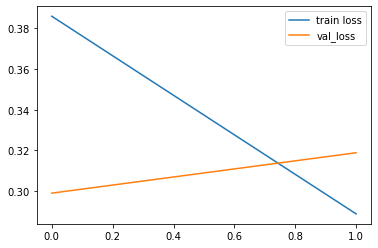

In [31]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


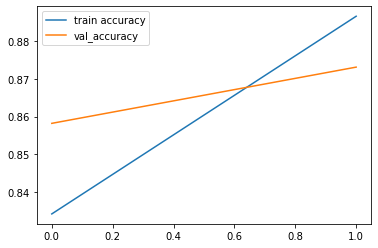

In [32]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [34]:
y_pred=model.predict(test_set)

In [35]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [36]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [37]:
model=load_model('model_vgg19.h5')

In [39]:
img=image.load_img('Data/test/Uninfected/2.png',target_size=(224,224))


In [40]:
x=image.img_to_array(img)

In [41]:
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
pr=model.predict(img_data)

In [45]:
a=np.argmax(pr,axis=1)

In [46]:
if(a==1):
    print('Unifected')
else:
    print('Infected')

Unifected
